# imports and defs

In [1]:
import utility_module_2_v_3 as uu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import numpy.ma as ma


path_obs='/media/vikram/subimal/Raw_Data/CRU/'
path_gcm = '/media/vikram/subimal/Raw_Data/GCM_BCSD_DATA/'


In [2]:

st=1901
en=2005
Nyears_train =en -st +1
Nyears_test = Nyears_train

data_bounds_cru=[ -125, 50, -70, 25]
data_bounds=[ 360-125, 50, 360-70, 25]

map_bounds= data_bounds
mp_spacing=10


# Read CRU data

In [3]:
filename =path_obs +'cru_ts3.23.1901.2014.pre.dat.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]

dt_st=0
dt_en=(en-st+1)*12

# cropping the study area out
l_lat,u_lat,lat_obs_cru=uu.find_bounds(lats,data_bounds_cru[3],data_bounds_cru[1])
l_lon,u_lon,lon_obs_cru=uu.find_bounds(lons,data_bounds_cru[0],data_bounds_cru[2])
lon_obs_cru=360+lon_obs_cru

pre_obs_cru = fh.variables['pre'][dt_st:dt_en,l_lat:u_lat+1,l_lon:u_lon+1]

print(pre_obs_cru.shape,lat_obs_cru.shape,lon_obs_cru.shape)

(1260, 52, 112) (52,) (112,)


In [4]:
#data_obs_cru_monb=data_obs_cru_mon
pre_obs=pre_obs_cru.data
mask_fine_obs=pre_obs_cru.mask

N=pre_obs.shape[0]


In [5]:
pre_obs_cru.fill_value

9.969209968386869e+36

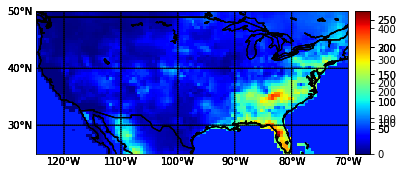

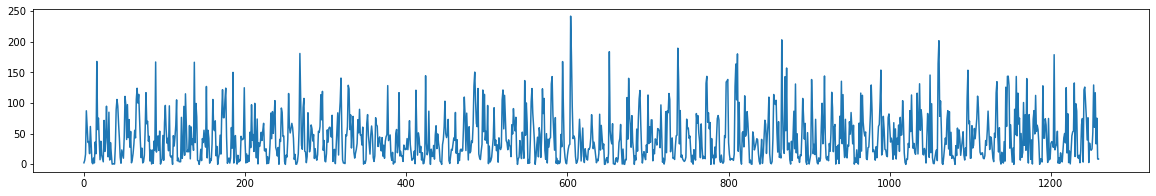

In [6]:


pre_obs[pre_obs>99999999]=np.nan
uu.map_plot_cyl(np.mean(pre_obs,axis=0),lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)

for t in range(N):
  pre_obs_t=pre_obs[t,:,:]
  pre_obs_t[np.isnan(pre_obs_t)]=np.nanmean(pre_obs_t)
  pre_obs[t,:,:]=pre_obs_t

uu.map_plot_cyl(np.mean(pre_obs,axis=0),lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)
uu.map_plot_cyl(pre_obs[1,:,:],lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)
uu.map_plot_cyl(pre_obs[7,:,:],lat_obs_cru,lon_obs_cru,map_bounds,mp_spacing=10)


plt.figure(figsize=(20,3))
plt.plot(pre_obs[:,25,50])

# Read GCM

## MIROC_ESM

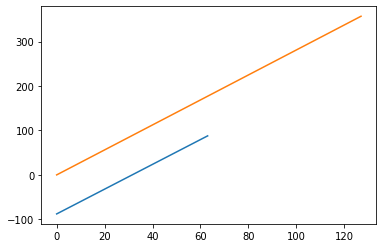

In [7]:
# reading file(s)
gcm_name='MIROC_ESM'
filename = path_gcm + '/MIROC_ESM/pr_day_MIROC-ESM_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

# cropping years before 1901
st_gcm=1850
dt_data_st=np.datetime64(str(st_gcm)+'-01-01')
dt_st=np.datetime64(str(st)+'-01-01')
index_of_st=((dt_st- dt_data_st) / np.timedelta64(1, 'D')).astype(int)

pre_gcm_daily = fh.variables['pr'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data * 3600 *24



In [61]:
print(pre_gcm_daily.shape,lat_gcm.shape,lon_gcm.shape,st_gcm)

(38351, 11, 22) (11,) (22,) 1850


## CanESM
Input file 
- contains one file \
- no leap year

38325 == 38325


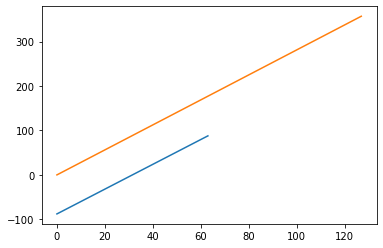

In [38]:
# reading file(s)
gcm_name='CanESM2'
filename = path_gcm + '/CanESM2/pr_day_CanESM2_historical_r1i1p1_18500101-20051231.nc'
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

# cropping years before 1901
st_gcm=1850
dt_st=1901
index_of_st=(dt_st- st_gcm) *365

#print(fh)
pre_gcm_daily = fh.variables['pr'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data*3600*24
print(pre_gcm_daily.shape[0],"==",365*105)
pre_gcm_daily=uu.add_leap_years_sts(pre_gcm_daily,st,en)[0]



In [39]:

print(pre_gcm_daily.shape,N-pre_gcm_daily.shape[0],lat_gcm.shape,lon_gcm.shape,st_gcm)
N

(38351, 11, 22) -37091 (11,) (22,) 1850


1260

## GFDL_CM3
Input files:
- 5 year files
- no leap years


In [89]:
gcm_name='GFDL_CM3'
st_gcm=1901
def get_fname(var,str1,str2):
  url= path_gcm + '/GFDL_CM3/'+var+'_day_GFDL-CM3_historical_r1i1p1_'+str1+'-'+str2+'.nc'
  return url

delta=5
def get_urls(var):
  fname_list=[]
  for yeaR in range(1900,2004,delta):
    str1=str(yeaR)+'0101'
    str2=str(yeaR+delta-1)+'1231'
    
    fname_list.append(get_fname(var,str1,str2))

  str1=str(2005)+'0101'
  str2=str(2005)+'1231'
  
  fname_list.append(get_fname(var,str1,str2))
  return fname_list


fnames=get_urls('pr')

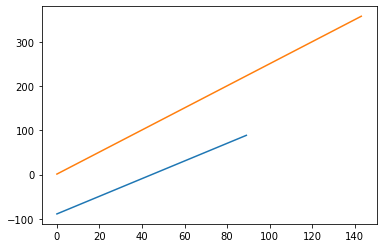

In [93]:
# reading file(s)
filename = fnames[0]
fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])

for i in range(len(fnames)):
  filename = fnames[i]
  fh = Dataset(filename, mode='r')
  lons = fh.variables['lon'][:]
  lats = fh.variables['lat'][:]
  #print(fh)
  data = fh.variables['pr'][:,l_lat:u_lat+1,l_lon:u_lon+1].data  * 3600 *24 

  if i==0:
    # starts at 1901
    pre_gcm_daily=data[365:,:,:]
  else:
    pre_gcm_daily=np.concatenate((pre_gcm_daily,data),axis=0)
pre_gcm_daily=uu.add_leap_years_sts(pre_gcm_daily,st,en)[0]

In [94]:
print(pre_gcm_daily.shape,N-pre_gcm_daily.shape[0],lat_gcm.shape,lon_gcm.shape,st_gcm)

(38351, 14, 24) -37091 (14,) (24,) 1901


# Convert to monthly data

In [62]:
pre_gcm=uu.daily_to_monthly_sts(pre_gcm_daily,st,en,method='SUM')
del pre_gcm_daily


Monthly data dimensions: (1260, 11, 22)


# other GCMs

In [ ]:
/media/vikram/One Touch/New CMIP5/CNRM_CM5/pr_Amon_CNRM-CM5_historical_r1i1p1_190001-200512.nc
/media/vikram/One Touch/New CMIP5/MRI_ESM1/pr_Amon_MRI-ESM1_historical_r1i1p1_185101-200512.nc
/media/vikram/One Touch/New CMIP5/ACCESS1_0/pr_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/MIROC_ESM/pr_Amon_MIROC-ESM_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/NorESM1_M/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/MPI_ESM_MR/pr_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc
/media/vikram/One Touch/New CMIP5/CM5A_LR/pr_Amon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc


(1860, 160, 320) (56613,) 56575


NameError: name 'data_gcm_daily' is not defined

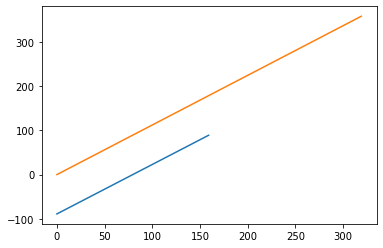

In [7]:
# reading file(s)
path_gcm  = "/media/vikram/One Touch/New CMIP5/"

gcm_name='MRI_ESM1'
filename = path_gcm + 'MRI_ESM1/pr_Amon_MRI-ESM1_historical_r1i1p1_185101-200512.nc'
st_gcm=1851


# gcm_name='ACCESS1_0'
# filename = path_gcm + 'ACCESS1_0/pr_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc'
# st_gcm=1850


# gcm_name='NorESM1_M'
# filename = path_gcm + 'NorESM1_M/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc'
# st_gcm=1850


# gcm_name='CM5A_LR'
# filename = path_gcm + 'CM5A_LR/pr_Amon_IPSL-CM5A-LR_historical_r1i1p1_185001-200512.nc'
# st_gcm=1850


# gcm_name='CNRM_CM5'
# filename = path_gcm + 'CNRM_CM5/pr_Amon_CNRM-CM5_historical_r1i1p1_190001-200512.nc'
# st_gcm=1900


# gcm_name='MPI_ESM_MR'
# filename = path_gcm + 'MPI_ESM_MR/pr_Amon_MPI-ESM-MR_historical_r1i1p1_185001-200512.nc'
# st_gcm=1850



fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])


date_gcms = pd.date_range(start=str(st_gcm) + "/01/01",end="2005/12/31",freq = "D")
print(fh.variables['pr'].shape,date_gcms.shape,365*(2005 - st_gcm+1))

# cropping years before 1901

dt_st=1901
index_of_st=(st- st_gcm) *12


pre_gcm = fh.variables['pr'][index_of_st:,l_lat:u_lat+1,l_lon:u_lon+1].data*3600*24 *30
print(data_gcm_daily.shape[0],"==",12*105)
# data_gcm_daily=uu.add_leap_years_sts(data_gcm_daily,st,en)[0]

In [74]:
st

1901

# PLot

(1260, 14, 24)


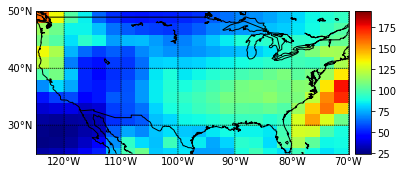

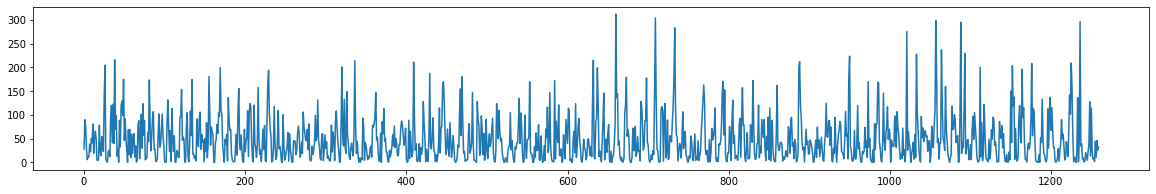

In [96]:

uu.map_plot_cyl(np.mean(pre_gcm,axis=0),lat_gcm,lon_gcm,map_bounds,mp_spacing=10)

plt.figure(figsize=(20,3))
plt.plot(pre_gcm[:,5,5])
print(pre_gcm.shape)

(1140, 128, 256) 1140
1140 == 1140


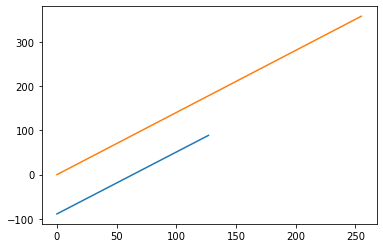

In [44]:
# reading file(s)
st_future = 2006
en_future = 2100

path_gcm  = "/media/vikram/One Touch/New CMIP5/"

gcm_name='CanESM2'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/CansESM2/pr_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc"
st_gcm=2006

gcm_name='GFDL_CM3'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/GFDL_CM3/pr_Amon_GFDL-CM3_rcp85_r1i1p1_200601-210012.nc"

gcm_name='NorESM1_M'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/NorESM/pr_Amon_NorESM1-M_rcp85_r1i1p1_200601-210012.nc"

gcm_name='CM5A_LR'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/IPSL_CM5A/pr_Amon_IPSL-CM5A-LR_rcp85_r1i1p1_200601-230012.nc"

gcm_name='MPI_ESM_MR'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/MPI_ESM_MR/pr_Amon_MPI-ESM-MR_rcp85_r1i1p1_200601-210012.nc"

gcm_name='MRI_ESM1'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/MRI_ESM/pr_Amon_MRI-ESM1_rcp85_r1i1p1_200601-210012.nc"

gcm_name='MIROC_ESM'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/MIROC_ESM/pr_Amon_MIROC-ESM_rcp85_r1i1p1_200601-210012.nc"

gcm_name='ACCESS1_0'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/ACCESS1_0/pr_Amon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc"

gcm_name='CNRM_CM5'
filename = "/media/vikram/One Touch/New CMIP5/rcp85/CNRM_CM5/pr_Amon_CNRM-CM5_rcp85_r1i1p1_200601-210012.nc"





fh = Dataset(filename, mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
plt.plot(lats)
plt.plot(lons)
# cropping the study area out
l_lat,u_lat,lat_gcm=uu.find_bounds(lats,data_bounds[3],data_bounds[1])
l_lon,u_lon,lon_gcm=uu.find_bounds(lons,data_bounds[0],data_bounds[2])


# date_gcms = pd.date_range(start=str(st_gcm) + "/01/01",end="2100/12/31",freq = "D")
print(fh.variables['pr'].shape,12*(2100 - st_gcm+1))

# cropping years before 1901

dt_st=2006
index_of_st=(st_future- st_gcm) *12
index_of_en=(en_future + 1 - st_gcm) *12 


pr_gcm_future = fh.variables['pr'][index_of_st:index_of_en,l_lat:u_lat+1,l_lon:u_lon+1].data*3600*24 *30
print(pr_gcm_future.shape[0],"==",12*95)
# data_gcm_daily=uu.add_leap_years_sts(data_gcm_d

# Writing outputs

In [45]:
# path_out = '/home/vikram/BCSD_data/' + 'US_P_BCSD_eqm/'
# !mkdir '/home/vikram/BCSD_data/US_P_BCSD_eqm'

path_out = '/home/vikram/BCSD_data/' + 'US_P_BCSD/'
!mkdir '/home/vikram/BCSD_data/US_P_BCSD/'

mkdir: cannot create directory ‘/home/vikram/BCSD_data/US_P_BCSD/’: File exists


In [46]:
gcm_name

'CNRM_CM5'

In [47]:
np.save(path_out+'pre_gcm_future_'+gcm_name,pr_gcm_future)


In [64]:
pre_obs_coarse=np.zeros(pre_gcm.shape)
pre_gcm_fine=np.zeros(pre_obs.shape)

for i in range(pre_obs.shape[0]):
  pre_obs_coarse[i,:,:]=uu.regrid(pre_obs[i,:,:],lat_obs_cru,lon_obs_cru,lat_gcm,lon_gcm)
  pre_gcm_fine[i,:,:]=uu.regrid(pre_gcm[i,:,:],lat_gcm,lon_gcm,lat_obs_cru,lon_obs_cru)

metadata={'st':st,
     'en':en,
     'data_bounds':data_bounds,
     'Nyears_train':Nyears_train,
     'Nyears_test':Nyears_test,
     'path_out':path_out,

     'mask':mask_fine_obs,
     'lat_obs':lat_obs_cru,
     'lat_gcm':lat_gcm,
     'lon_obs':lon_obs_cru,
     'lon_gcm':lon_gcm}

np.save(path_out+'pre_metadata'+gcm_name,metadata)
np.save(path_out+'pre_obs',pre_obs)
np.save(path_out+'pre_gcm_'+gcm_name,pre_gcm)
np.save(path_out+'pre_obs_coarse',pre_obs_coarse)
np.save(path_out+'pre_gcm_fine'+gcm_name,pre_gcm_fine)


